In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
path = r"C:\Users\Tzagkari\Documents\GitHub\ASTRO-BEAM\DataIntro\spectrum.csv"
data=pd.read_csv(path , header=None)
#path = '/Users/User/Downloads/spectrum_data_excel.xlsx'
#data=pd.read_excel(path , header=None)
data.columns=("f", "x", "y", "p")

### Calculating the rolling mean for power/intensity

In [14]:
# the rolling mean for power/intensity
data['rolp']=data['p'].rolling(15).mean()
max_p=data['rolp'].max()
max_f = data.loc[data['rolp'].idxmax(), 'f']


### Identyfying the rest frequency of the spectar line that is showing from the received data
### first try for atoms/molecules whose rest frequencies are known
HI (1420.4057) , OH (1612.2310 , 1665.4018, 1667.3590) , H20 (22235.0799) , NH3 (23694.5060 , 23722.6340, 23870.1300)
measuring units are MHz. 


In [15]:
rest_f=[1420.4057, 1612.2310, 1665.4018, 1667.3590, 22235.0799, 23694.5060, 23722.6340, 23870.1300]

#df=np.abs(max_f-rest_values)
#line = False
#if np.any(df<=0.5):
 #   condition=np.where(df<=0.5)[0][0]
 #   fo=rest_values[condition]
 #   print(fo)
 #   h=np.linspace(data['p'].min(), data['p'].max())
 #   x=np.full_like(h,fo)
  #  line = True 
#else :
 #  print("there is no spectral line")

# trying my function
fo = 0
def fitting(a, b, c):
    results=[]
    for x in a:
        for y in b:
            df = np.abs(x - y)
            if np.any(df <= 0.5):
                condition = np.where(df <= 0.5)[0][0]
                fo = b[condition]
                # print(fo)
                h = np.linspace(np.min(c), np.max(c))
                x_line = np.full_like(h, fo)
                
                results.append(x)
                
            else:
                continue

    return results, y , fo, h

results, y, fo, h = fitting(data['f'], rest_f , data['p'])



C:\Users\Tzagkari\AppData\Local\Temp\ipykernel_11112\3751787197.py:23: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  condition = np.where(df <= 0.5)[0][0]


Find the radial velocity

In [16]:
def u(f):
    c=3*10**5
    return ((fo -f)/fo )*c

data['u']=u(data.f)

def inv(u):
    c=3*10**5
    return fo - (u/c)*fo

## Visualise the data

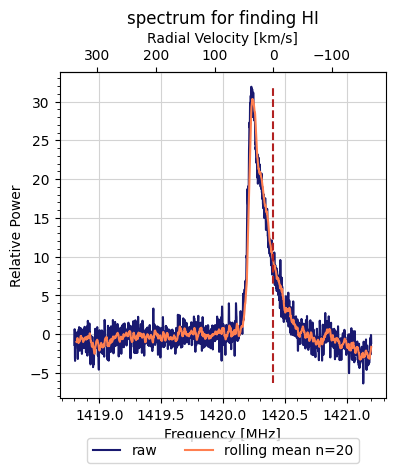

In [17]:

#visualise the data
fig, ax1=plt.subplots()
ax1.plot(data.f, data.p, color='midnightblue', label='raw')
ax1.plot(data.f , data.rolp, color='coral', label='rolling mean n=20')
#if line :
ax1.plot(fo*np.ones(len(h)),h, color='firebrick', linestyle='--', linewidth =1.5 )
ax1.set_xlabel("Frequency [MHz]")
ax1.set_ylabel("Relative Power")
ax1.yaxis.get_ticklocs(minor=True)
ax1.xaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.set_box_aspect(1.0)

ax2=ax1.secondary_xaxis('top', functions=(u, inv))
ax2.set_xlabel("Radial Velocity [km/s]")
ax2.xaxis.get_ticklocs(minor = True)


plt.grid(True, linestyle ="solid", c="lightgrey")
plt.title("spectrum for finding HI")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.subplots_adjust(bottom=0.2)
plt.show()
